___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [25]:
sns.set_style('darkgrid')

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [29]:
ad_df = pd.read_csv('advertising.csv')

**Check the head of ad_data**

In [30]:
print ad_df.columns

Index([u'Daily Time Spent on Site', u'Age', u'Area Income',
       u'Daily Internet Usage', u'Ad Topic Line', u'City', u'Male', u'Country',
       u'Timestamp', u'Clicked on Ad'],
      dtype='object')


In [31]:
ad_df.rename(columns={'Daily Time Spent on Site': 'time_on_site', 
                      'Age': 'age', 'Area Income': 'area_income', 
                      'Daily Internet Usage': 'net_usage', 
                      'Ad Topic Line': 'topic_line', 
                      'City': 'city',
                      'Male': 'male',
                      'Country': 'country', 
                      'Timestamp': 'ts', 
                      'Clicked on Ad': 'ad_click'}, inplace=True)

In [32]:
ad_df.head()

,time_on_site,age,area_income,net_usage,topic_line,city,male,country,ts,ad_click
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info and describe() on ad_data**

In [33]:
print 'INFO:', ad_df.info()
print
print 'Ad df description:'
ad_df.describe()

INFO:<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
time_on_site    1000 non-null float64
age             1000 non-null int64
area_income     1000 non-null float64
net_usage       1000 non-null float64
topic_line      1000 non-null object
city            1000 non-null object
male            1000 non-null int64
country         1000 non-null object
ts              1000 non-null object
ad_click        1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB
 None

Ad df description:


,time_on_site,age,area_income,net_usage,male,ad_click
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

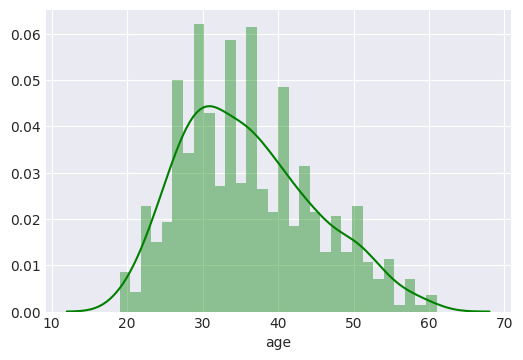

In [40]:
sns.distplot(ad_df['age'], bins=30, color='green')

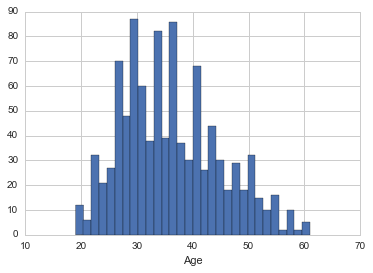

**Create a jointplot showing Area Income versus Age.**

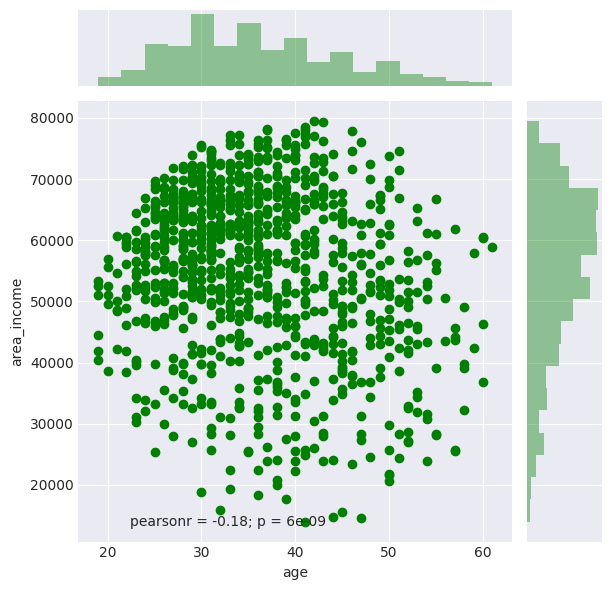

In [41]:
sns.jointplot(x='age', y='area_income', data=ad_df, color='green')

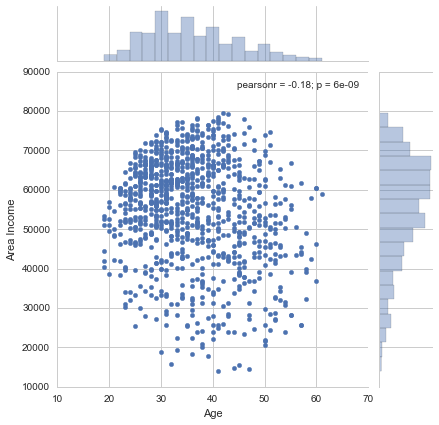

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

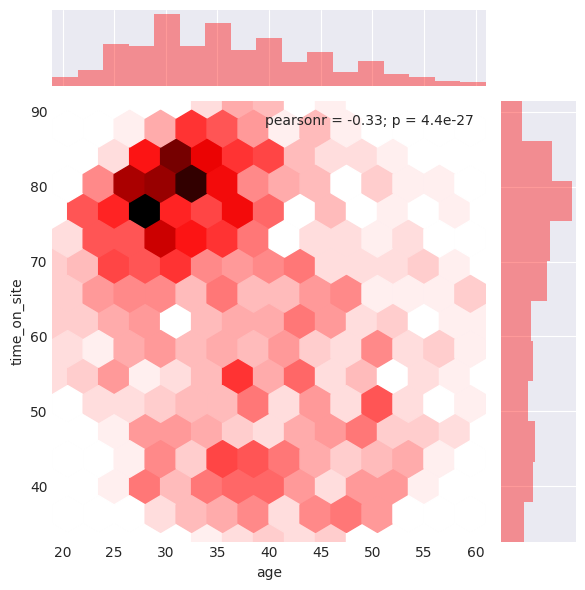

In [50]:
sns.jointplot(x='age', y='time_on_site', data=ad_df, kind='hex', color='red')

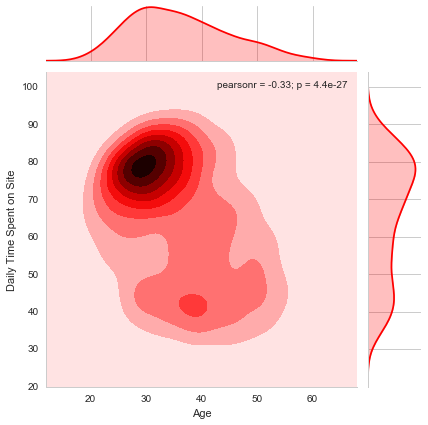

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

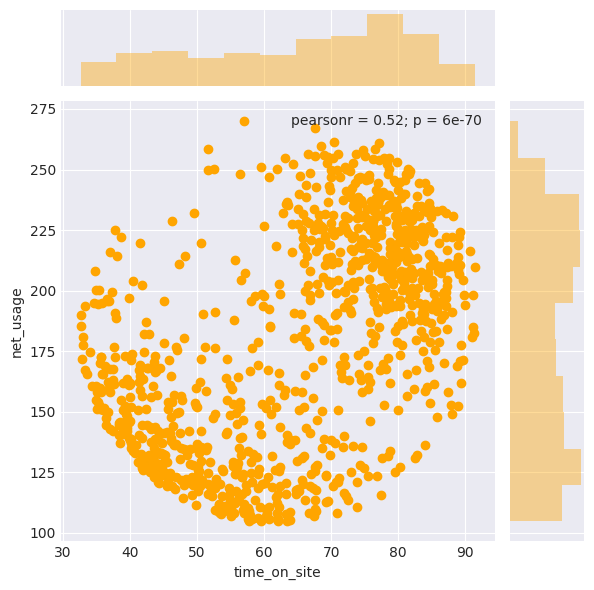

In [53]:
sns.jointplot(x='time_on_site', y='net_usage', data=ad_df, color='orange')

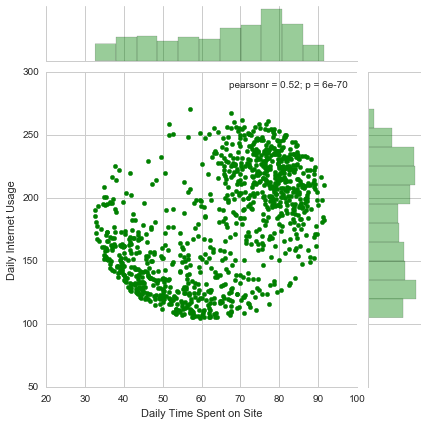

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

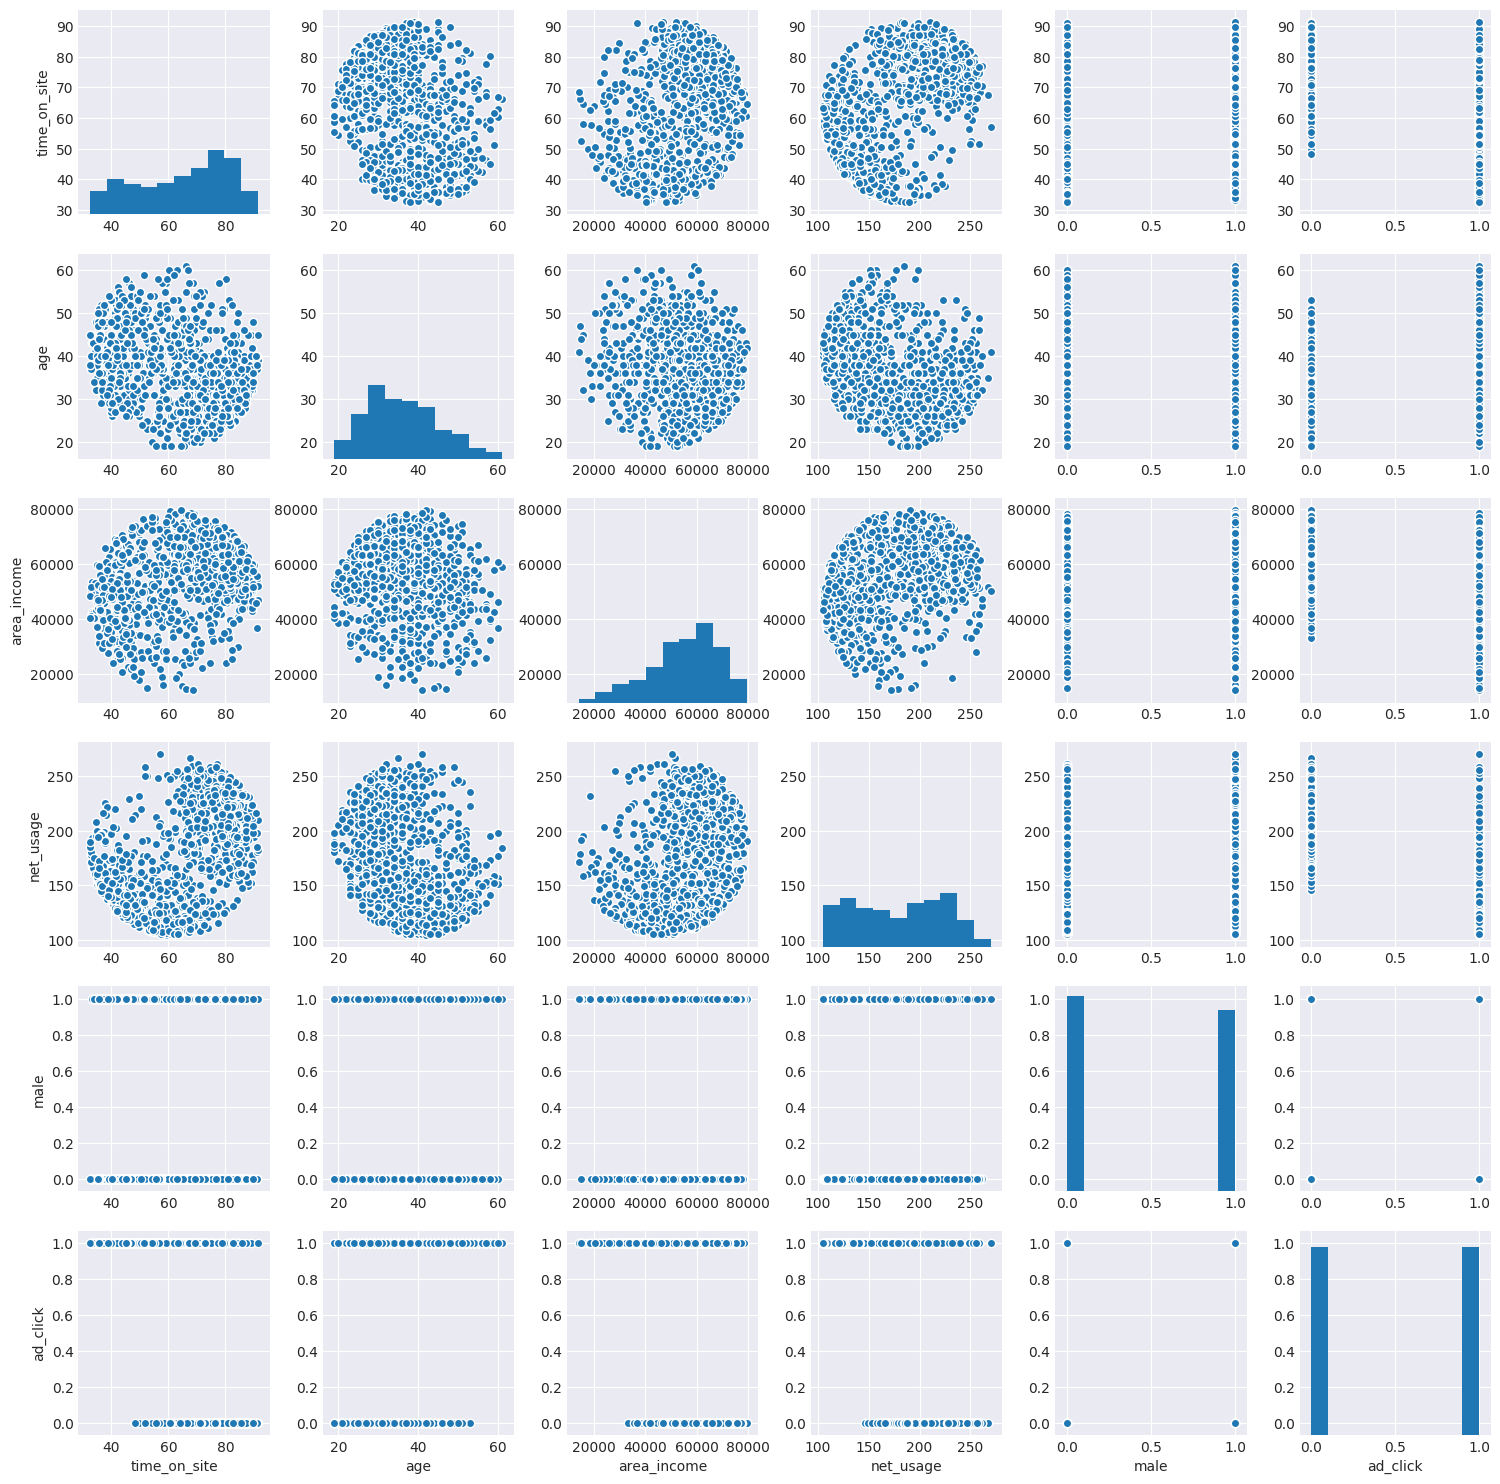

In [54]:
sns.pairplot(ad_df, palette='BuGn')

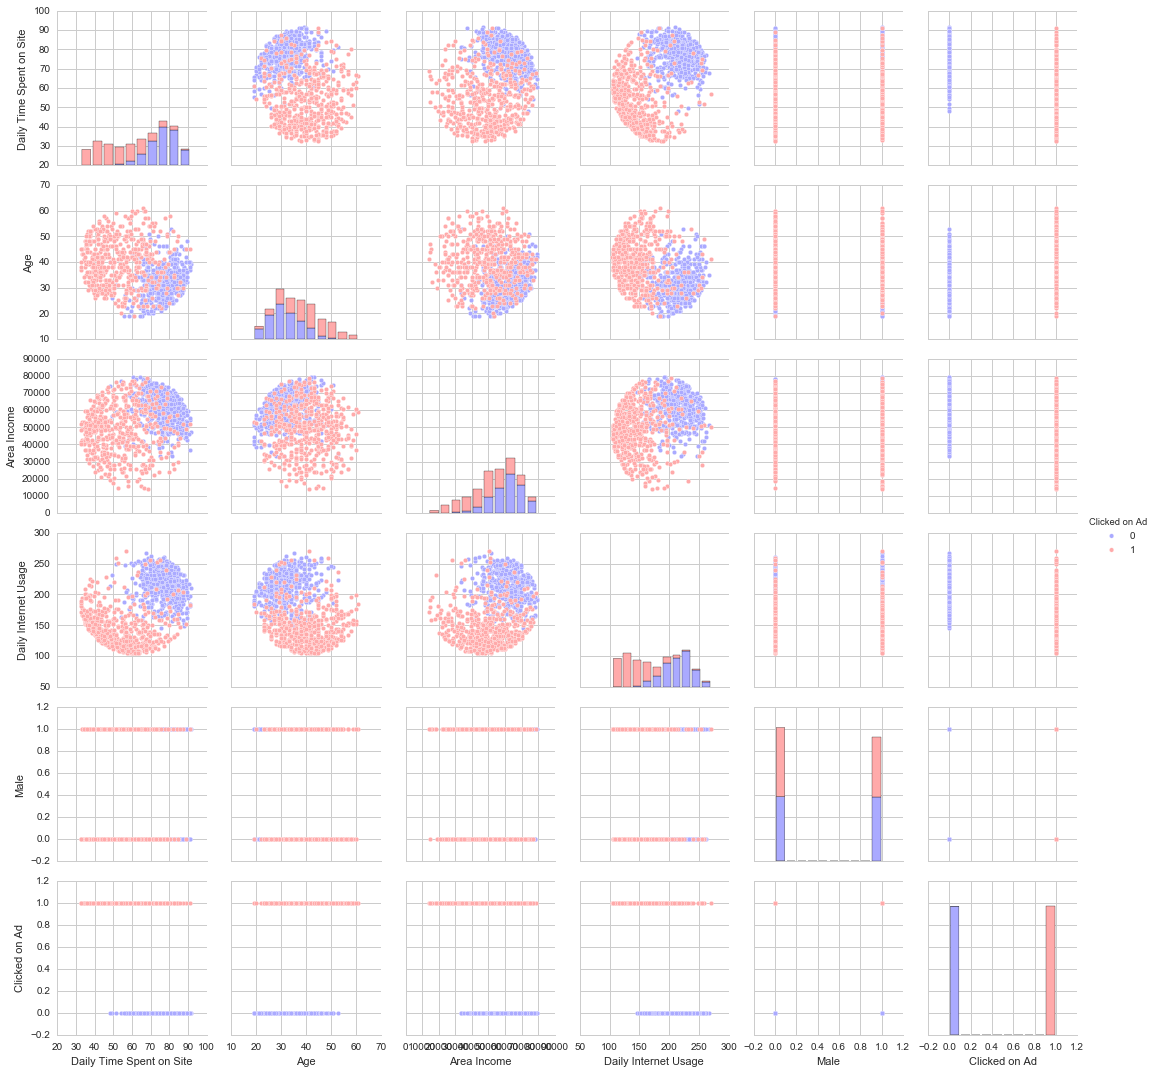

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [55]:
from sklearn.model_selection import train_test_split

In [57]:
X = ad_df[['time_on_site', 'age', 'area_income', 'net_usage', 'male']]
y = ad_df[['ad_click']]

In [59]:
print X[:9]
print
print y[:9]

   time_on_site  age  area_income  net_usage  male
0         68.95   35     61833.90     256.09     0
1         80.23   31     68441.85     193.77     1
2         69.47   26     59785.94     236.50     0
3         74.15   29     54806.18     245.89     1
4         68.37   35     73889.99     225.58     0
5         59.99   23     59761.56     226.74     1
6         88.91   33     53852.85     208.36     0
7         66.00   48     24593.33     131.76     1
8         74.53   30     68862.00     221.51     1

   ad_click
0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         1
8         0


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [65]:
y_train.head()

,ad_click
109,0
695,0
637,0
992,1
673,1


** Train and fit a logistic regression model on the training set.**

In [61]:
from sklearn.linear_model import LogisticRegression

In [144]:
clf = LogisticRegression(C=1, solver='liblinear', class_weight='balanced')

In [145]:
clf.fit(X_train, y_train.values.ravel())

LogisticRegression(C=50, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Predictions and Evaluations
** Now predict values for the testing data.**

In [146]:
y_pred = clf.predict(X_test)

** Create a classification report for the model.**

In [147]:
clf.coef_

array([[ -5.36620268e-02,   2.43903587e-01,  -2.34296969e-05,
         -2.11401056e-02,   1.01613189e-03]])

In [148]:
clf.score(X_test, y_test) * 100

88.484848484848484

In [143]:
coefs = clf.coef_
print 'classifier coefficients:'
for idx, col in enumerate(X_test.columns):
    print col, coefs[0][idx]

classifier coefficients:
time_on_site -0.0536596094179
age 0.243892205382
area_income -2.34274656571e-05
net_usage -0.0211395894811
male 0.00101609167688


In [125]:
from sklearn.metrics import classification_report

In [126]:
print classification_report(y_test, y_pred)

             precision    recall  f1-score   support

          0       0.85      0.92      0.89       160
          1       0.92      0.85      0.88       170

avg / total       0.89      0.88      0.88       330



             precision    recall  f1-score   support

          0       0.87      0.96      0.91       162
          1       0.96      0.86      0.91       168

avg / total       0.91      0.91      0.91       330



In [171]:
ypred_ser = pd.Series(y_pred)
type(ypred_ser)

pandas.core.series.Series

In [190]:
adpred_df = ad_df.copy()
adpred_df['y_pred'] = ypred_ser
adpred_df.dropna(inplace=True)
adpred_df['correct'] = adpred_df[['ad_click', 'y_pred']].apply(lambda x: x[0] == int(x[1]), axis=1)

In [193]:
print adpred_df.shape
adpred_df.sample(25)

(330, 12)


,time_on_site,age,area_income,net_usage,topic_line,city,male,country,ts,ad_click,y_pred,correct
73,33.21,43,42650.32,167.07,Polarized clear-thinking budgetary management,Wilcoxport,1,Turkey,2016-05-10 17:39:06,1,1.0,True
301,52.62,50,73863.25,176.52,Enterprise-wide foreground emulation,Port Juan,0,Seychelles,2016-02-01 20:30:35,1,1.0,True
286,56.01,26,46339.25,127.26,Re-engineered real-time success,Garciamouth,0,Tonga,2016-07-05 18:59:45,1,0.0,False
247,57.05,41,50278.89,269.96,Seamless full-range website,Port Erinberg,1,Sierra Leone,2016-01-09 03:45:19,1,0.0,False
182,62.95,60,36752.24,157.04,Polarized tangible collaboration,Youngfort,0,Peru,2016-05-24 13:30:38,1,1.0,True
232,62.42,38,74445.18,143.94,Diverse executive groupware,West Tinashire,0,Saint Pierre and Miquelon,2016-07-19 07:59:18,1,0.0,False
168,59.59,42,43662.10,104.78,Re-engineered demand-driven capacity,Samanthaland,1,Brazil,2016-07-06 18:36:01,1,1.0,True
57,44.98,49,52336.64,129.31,Organized global model,Port Sarahshire,0,Svalbard & Jan Mayen Islands,2016-04-10 00:13:47,1,0.0,False
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,0.0,True
221,75.83,27,67516.07,200.59,Managed upward-trending instruction set,East Brianberg,0,Estonia,2016-03-04 10:13:48,0,0.0,True


/home/scruffy/anaconda2/lib/python2.7/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


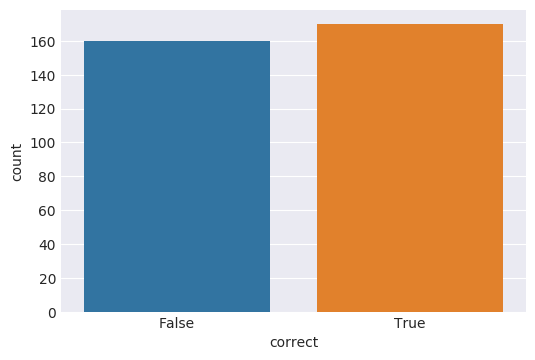

In [192]:
sns.countplot(adpred_df['correct'])

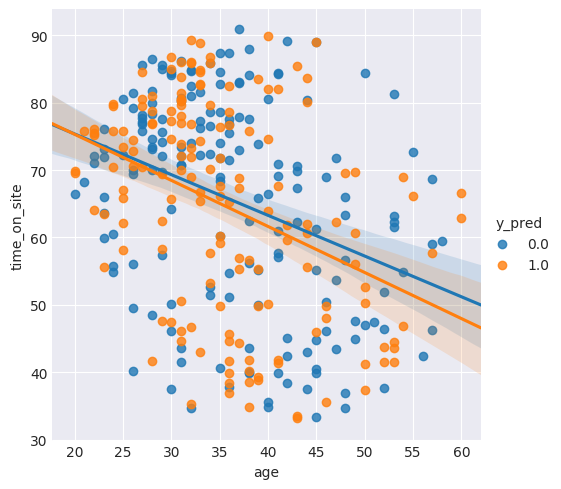

In [194]:
sns.lmplot(x='age', y='time_on_site', data=adpred_df, hue='y_pred')

## Great Job!